# Exercise A-6: Numerical instability caused by cancellation

We aim to evaluate the function
$$f(x) = exp(x) − 1$$
on a computer (in double precision arithmetic) for very small values of $|x|$, i.e., $0 < |x| ≪ 1$.

1. Experiment on the computer using double precision arithmetic (you
   may assume that the exp function is implemented correctly in double
   precision). Choose $x = 10^{−k}, k = 1, 2, 3, 4, 5, . . ..$
   
   For comparison, you can obtain an “almost exact” value of the function
   $f$ using the Taylor expansion of $exp(x)$ about $x = 0$, for example, up to the $10^{\text{th}}$ degree (this is a brute-force method).
   
   For comparison of the results, plot the relative error between the two
   evaluation methods on a logarithmic scale.
2. By comparing the two methods, you will see that the direct evaluation
   of $f(x)$ in its given form is numerically unstable, i.e., it yields very inaccurate results for $|x| \Rightarrow 0$. Can you explain this observation?

In [7]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix, Identity, Transpose, Eq, init_printing, symbols, latex, det, pi, cos, sin
from sympy.abc import A
from IPython.display import display, Math
import math

In [2]:
# Pre-requisites for pretty printing
init_printing()

In [3]:
# Function to format matrices dynamically for LaTeX
def format_matrix(name, matrix):
    return f"{name} = " + latex(matrix)
# Function to format determinants dynamically for LaTeX
def format_determinant(name, determinant):
    return f"\\det({name}) = " + latex(determinant)
# Function to format vectors dynamically for LaTeX
def format_vector(name, vector):
    return f"{name} = " + latex(vector)
def format_dot_product(name, matrix1: Matrix, matrix2: Matrix):
    result = matrix1 * matrix2
    # Start LaTeX formatting
    latex_str = f"{name} = \\begin{{bmatrix}}\n"
    # Iterate over the result matrix to format each cell
    for i in range(result.rows):
        row_operations = []
        for j in range(result.cols):
            terms = []
            for k in range(matrix1.cols):
                terms.append(f"{latex(matrix1[i, k])} \\cdot {latex(matrix2[k, j]) if matrix2.shape[1] > 1 else latex(matrix2[k])}")
            operation = " + ".join(terms)
            row_operations.append(f"({operation})")
        latex_str += " & ".join(row_operations) + " \\\\\n"

    latex_str += "\\end{bmatrix} = " + latex(result)
    return result, latex_str

# Solution for 1)

Experiment on the computer using double precision arithmetic (you may assume that the exp function is implemented correctly in double
precision). Choose $x = 10^{−k}, k = 1, 2, 3, 4, 5, . . ..$

For comparison, you can obtain an “almost exact” value of the function
$f$ using the Taylor expansion of $exp(x)$ about $x = 0$, for example, up to the $10^{\text{th}}$ degree (this is a brute-force method).

For comparison of the results, plot the relative error between the two
evaluation methods on a logarithmic scale.

In [23]:
def taylor_exp_minus_one(x):
    return sum((x ** n) / math.factorial(n) for n in range(1, 11))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

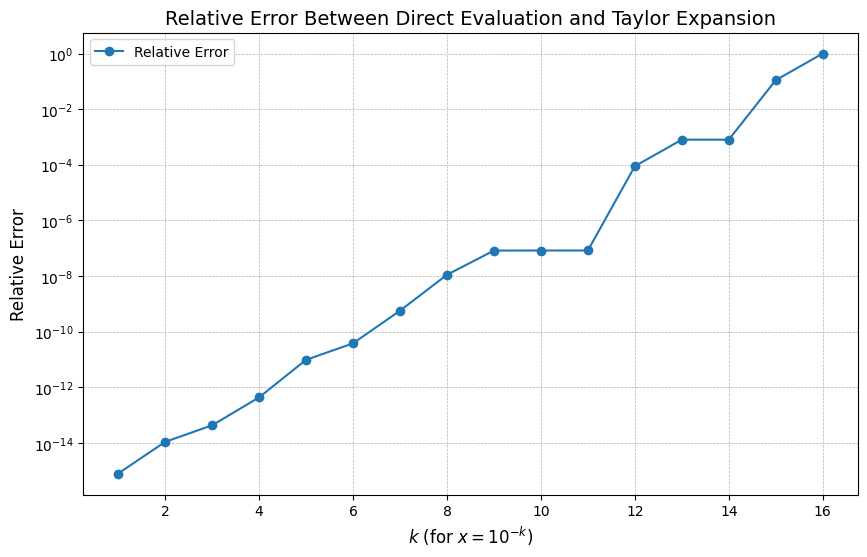

In [47]:
# Define x = 10^(-k) for k = 1, 2, ..., 15
k_values = np.arange(1, 17)
x_values = 10.0 ** (-k_values)

# Direct computation of f(x) = exp(x) - 1
f_direct = np.exp(x_values) - 1

f_taylor = np.array([taylor_exp_minus_one(x) for x in x_values])

# Compute relative error
relative_error = np.abs(f_direct - f_taylor) / np.abs(f_taylor)

for i in range(k_values.argmax() + 1):
    display(Math(f"x = {x_values[i]}, \\ f_" + "{exp}" + f" = {f_direct[i]},\\ " + "f_{taylor}" + f" = {f_taylor[i]},\\ " + "err_{rel}" + f" = {relative_error[i]}"))

plt.figure(figsize=(10, 6))
plt.semilogy(k_values, relative_error, marker='o', label="Relative Error")
plt.xlabel(r"$k$ (for $x = 10^{-k}$)", fontsize=12)
plt.ylabel("Relative Error", fontsize=12)
plt.title("Relative Error Between Direct Evaluation and Taylor Expansion", fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()


# Solution for 2)

By comparing the two methods, you will see that the direct evaluation
   of $f(x)$ in its given form is numerically unstable, i.e., it yields very inaccurate results for $|x| \Rightarrow 0$. Can you explain this observation?

The numerical instability of the direct evaluation of $f(x) = \exp(x) - 1$ for very small $ |x| $ arises from the **loss of significant digits**, a common issue in floating-point arithmetic.

1. **Behavior of $ \exp(x) $ for Small $ |x| $:**
   - For small $ |x| $, $ \exp(x) $ approaches 1. Thus, $ f(x) = \exp(x) - 1 $ involves subtracting two numbers that are very close in magnitude.
   - Example: For $ x = 10^{-8} $, $ \exp(x) \approx 1.00000001 $, and subtracting 1 results in $ 0.00000001 $, but this small difference is prone to precision loss in floating-point representation.

2. **Floating-Point Precision and Cancellation Error:**
   - Floating-point numbers are represented with a fixed number of significant digits. When two nearly equal numbers are subtracted, the most significant digits cancel out, leaving only the less significant (and often imprecise) digits.
   - This phenomenon is called **cancellation**. It results in significant relative error because the magnitude of the result ($ f(x) $) is much smaller than the original numbers involved ($ \exp(x) $ and 1).

3. **Impact on Relative Error:**
   - The relative error is magnified because the denominator ($ f(x) $) becomes extremely small, while the numerator (error in computation) does not decrease proportionally. This leads to an apparent explosion in relative error for small $ x $.

4. **Why the Taylor Expansion Avoids Instability:**
   - The Taylor expansion computes $ f(x) $ directly as a sum of terms:
     $$
     f(x) \approx x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots
     $$
   - Each term in the series is computed explicitly, without involving the subtraction of nearly equal numbers. This eliminates the primary source of numerical instability.

The numerical instability in the direct evaluation of $ f(x) = \exp(x) - 1 $ is due to **cancellation**, which occurs when subtracting nearly equal numbers in floating-point arithmetic. 

The Taylor expansion avoids this problem by computing $ f(x) $ directly, term by term, ensuring greater precision for small $ |x| $.